In [1]:
from pydstarlite.implementation import *
from pydstarlite.lpa_star import LPAStar
from pydstarlite.dstarlite import DStarLite
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [2]:
from pydstarlite.implementation import draw_grid

In [18]:
GRAPH, START, END = grid_from_string("""
..............................
...######....######....######.
...A....#.........#.........#.
...######....######....######.
...#....#....#....#....#....#.
...#....#....#....#....#....#.
........#.........#.........#.
........#.........#.........#.
........#.........#.........#.
..................#...........
..................#...........
...######....######....######.
........#...................#.
........#....######....######.
........#....#.........#....#.
........#....#.........#....#.
........#....#..............#.
........#....#..............#.
........#....#..............#.
........#....#................
........#....#................
...######....#.........######.
........#....#..............#.
...######....######....######.
...#....#....#....#....#..Z.#.
...#....#....#....#....#....#.
........#.........#.........#.
........#.........#.........#.
........#.........#.........#.
..................#...........
""")

In [19]:
def empty_image(graph):
    image = 0.5 * np.ones((GRAPH.width, GRAPH.height, 4))
    image[:, :, 3] = 1
    return image

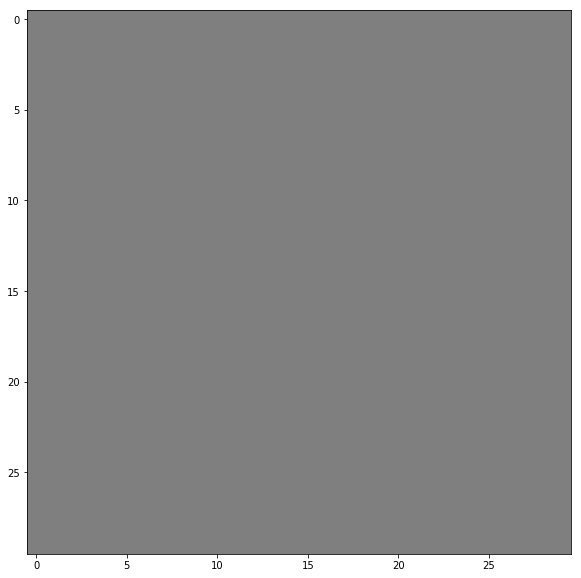

In [20]:
data = empty_image(GRAPH)
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
img = ax.imshow(data)

In [28]:
dstar = DStarLite(GRAPH, START, END)

In [29]:
SIMULATION = dstar.move_to_goal()

In [30]:
def init():
    img.set_data(data)
    return img,

In [31]:
def animate(args):
    (position, observation, walls) = args
    tmp = empty_image(GRAPH)
    tmp[END[1], END[0]] = [0, 0, 1, 1]

    tmp[position[1], position[0]] = [1, 0, 0, 1]
    for (x, y) in walls:
        tmp[y, x] = [0,0,0,1]
    for (x, y) in observation.keys():
        if (x, y) == position:
            continue
        else:
            (r, g, b, a) = tmp[y, x]
            tmp[y, x] = [r, g, b, 0.7]
    img.set_data(tmp)
    return img,

In [32]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=SIMULATION, interval=200, blit=True, save_count=200)

In [33]:
# Requires ffmpeg installed - `brew install ffmpeg` on Mac
HTML(anim.to_html5_video())

(26, 24) (26, 24)
